# **Linear Regression**

# Importing Libraries and Initializing Data :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extracting Data from csv to Dataframes

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_train.csv",index_col = 0)   
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_test_data.csv")

label_train = df_train["label"].values[:45000]         # Splitting Labelled Data for calculating accuracy
label_test = df_train["label"].values[45000:]

X = df_train.iloc[:45000,0:20].to_numpy()              # Labelled Training Data
x_test = df_train.iloc[45000:,0:20].to_numpy()         # Labelled Testing Data

# Standardizing features w.r.t Training data

x = (X - np.mean(X,axis=0))/np.std(X,axis = 0)               
x_test = (x_test - np.mean(X,axis=0))/np.std(X,axis = 0)

x = np.append(np.ones((45000,1)),x,axis = 1)              # For merging weights and biases into just weights 
x_test = np.append(np.ones([5000,1]),x_test,axis = 1)     # we add a ones column at the start of data

print(x.shape)
print(x_test.shape)                                         # checking dimensions
print(label_train.shape)


(45000, 21)
(5000, 21)
(45000,)


# Implementing R2 Score :

In [ ]:
def R2(x_test,m,y_test):
  y_pred = x_test @ m
  score = 1 - (np.sum((y_pred-y_test)**2,dtype = 'longdouble')/(np.sum(((y_test-np.mean(y_test))**2),dtype= 'longdouble')))
  return score

# Implementing Linear Regression :

After  10000  iterations :
loss =  4779.970440713488
Accuracy =  84.45229484298857209 %


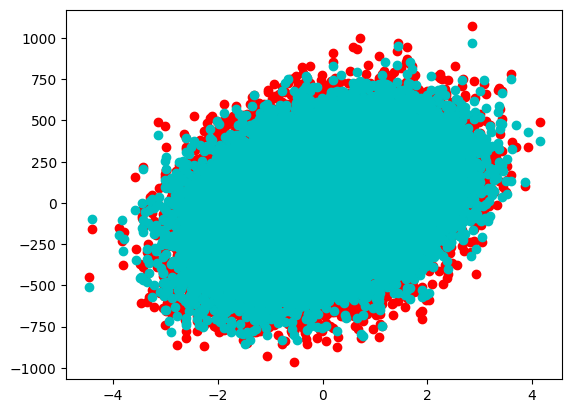

<Figure size 640x480 with 0 Axes>

In [17]:
def ML(no_of_iterations, learning_rate, x , y , x_test , y_test):
    
  row , col = x.shape       
  np.random.seed(0)
  m = np.random.randn(col)                               # initializing weights randomly 
  # lamb = 1e-6                                          # Regularisation hyperparameter
  
  for i in range(no_of_iterations+1):
  
    y_pred = np.dot(m,x.T)                               # Predicted label
    loss = (0.5/row)*np.sum((y_pred-y)**2)               # mean square error loss

# Update Rule :

    m = m - learning_rate*(np.dot(x.T, (y_pred-y)))/row  # + lamb*(np.sum(m**2))     # L2 regularisation
                                                                                     # x = label_train
                                                                                     # y = 2D nd array of training set 
    if (i+1) %10000 == 0 :
        print("After ",i+1 ," iterations :")
        print ("loss = ",loss)

        score = R2(x_test,m,y_test)                     
        print("Accuracy = ",score*100,"%")               # percentage R2 score
        
        plt.scatter(x[:,1],y,c='r')
        plt.scatter(x[:,1],y_pred,c='c')                 # plotting predicted labels against one variable
        plt.show()
        plt.clf()

  return m
    
param = ML(no_of_iterations= 10000, learning_rate = 0.03, x = x , y = label_train , x_test = x_test ,y_test = label_test)   # parameter


# Predicting labels of unlabelled data and storing labels into a csv file :

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_test_data.csv")

ids = df_test["ids"].values                                         # Unlabelled Id
test_data = df_test.iloc[:,1:21].to_numpy()                         # Unlabelled data
test_data = (test_data - np.mean(X,axis=0))/np.std(X,axis = 0)      # standardization
test_data = np.append(np.ones([20000,1]),test_data,axis=1)          # adding the ones term to merge bias into weights

print(test_data.shape)                                              # checking dimensions

y_test = np.dot(param,test_data.T)                                  # Predicted labels

# Storing predicted labels into dataframe

df_res = pd.DataFrame([ids,y_test]).T                               
df_res.columns = ["Ids","Output"]
df_res.to_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_regression_result.csv")

print (df_res)

(20000, 21)
           Ids      Output
0      96396.0    8.326947
1      80166.0  166.589556
2      20516.0   67.726690
3      88881.0 -101.469251
4      69115.0   27.550870
...        ...         ...
19995  59011.0  149.594670
19996  66308.0   39.347900
19997  99637.0   94.130196
19998  84616.0  305.568474
19999  66210.0 -162.953009

[20000 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
